# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №1

## №1 (20 баллов)

- Задача минимизации для множественной регресии выглядит вот так:
$$(Y - X\hat{\beta})'(Y - X\hat{\beta}) \rightarrow \min_{\hat{\beta}}$$
- Решите эту задачу минимизации и выведите формулу для оценок коэффициентов $\hat{\beta}$

${d_{\beta}}[(Y - X\beta)^T(Y - X\beta)] = d_{\beta}[(y - X\beta)^T] (y - X\beta) + (y - X\beta)^T d_{\beta}[(y - X\beta)]  = {d_\beta} [(-X\beta)^T] (y - X\beta) - (y - X\beta)^TX {d\beta} = -2 (y - X\beta)^TX {d\beta} = 0$

$2X^T(y-X\beta) = 0 $, $\hat\beta = (X^TX)^{-1} X^Ty$

## №2 (40 баллов)

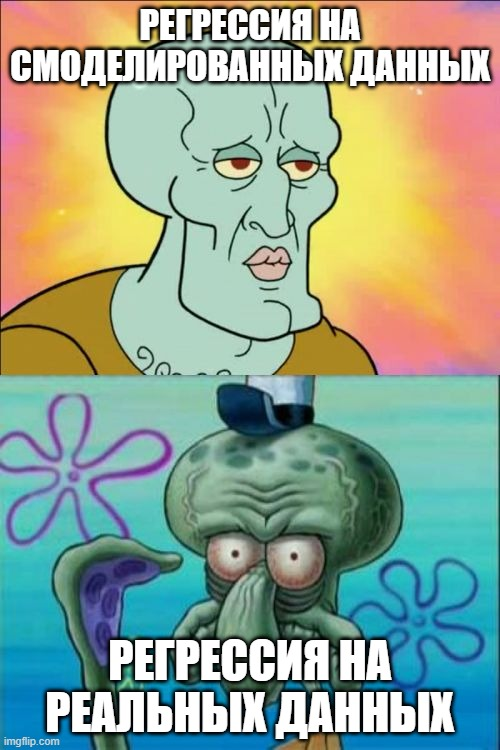

- У нас есть следующий датасет (`HW_001_001.csv`)
- Нам хочется понять, насколько уровень загрязнения воздуха (диоксид азота $NO_2$ в данном случае) влияет на результаты тестов внимания школьников. В данном домашнем задании будем смотреть на **время реакции**.
- Данные собирались в течение периода с января 2012 г. по март 2013 г. в Барселоне. В исследовании приняли участие 39 школ.
    - `react` - время реакции (ms)
    - `correct` - количество верных ответов
    - `omissions` - были ли тест не сдан
    - `no2_class` - уровень $NO_2$ в классе
    - `no2_home` - уровень $NO_2$ дома
    - `age` - возраст на момент исследования
    - `age0` - возраст поступления в школу
    - `sex` - пол
    - `grade` - класс
    - `overweight` - степень ожирения согласно ВОЗ
    - `lbweight` - весовая категория при рождении
    - `breastfeed` - продолжительность кормления грудью
    - `msmoke` - курила ли мать во время беременности
    - `meducation` - уровень образования матери
    - `feducation` - уровень образования отца
    - `siblings_old` - количество братьев\сестер старшего возраста
    - `siblings_old` - количество братьев\сестер младшего возраста
    - `sev_home` - социально-экономический индекс домашнего района
    - `green_home` - [степень озеленения домашнего района](https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php#:~:text=Normalized%20Difference%20Vegetation%20Index%20(NDVI,up%20the%20spectrum%20of%20sunlight)
    - `noise_school` - уровень шума в школе (дБ)
    - `sev_school` - социально-экономический индекс школы
    - `precip` - осадки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df_matrix = pd.read_csv('HW_001_001.csv')

- Во-первых, посмотрите на описательные статистики

In [3]:
df_matrix.sample(3)

,react,correct,omissions,no2_class,no2_home,age,age0,sex,grade,overweight,...,msmoke,meducation,feducation,siblings_old,siblings_young,sev_home,green_home,noise_school,sev_school,precip
235,722.189189,112.0,0.0,20.647024,58.108498,9.300479,2.0,Male,3rd,Normal weight,...,No smoking,University,University,1.0,0.0,0.612903,0.191327,42.3,0.516129,0.05
686,672.714286,126.0,0.0,22.818430,44.562218,10.417522,3.0,Female,4th,Normal weight,...,No smoking,University,University,2.0,0.0,0.096774,0.258895,32.6,0.129032,2.10
179,773.121951,123.0,2.0,37.234077,114.755220,8.279261,3.0,Female,2nd,Overweight,...,No smoking,University,University,1.0,0.0,0.451613,0.143684,41.7,0.483871,0.00


In [4]:
df_matrix.describe()

,react,correct,omissions,no2_class,no2_home,age,age0,siblings_old,siblings_young,sev_home,green_home,noise_school,sev_school,precip
count,1084.000000,1084.000000,1084.000000,1089.000000,1089.000000,1089.000000,1082.000000,1081.000000,1083.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.00000
mean,742.480809,121.826568,1.728782,30.167792,54.718322,9.087880,3.218022,0.573543,0.565097,0.419681,0.198072,37.963545,0.409639,0.55932
std,145.444639,7.001609,3.812825,9.895886,18.047859,0.886907,1.293168,0.675225,0.690683,0.199914,0.077777,4.491651,0.206439,1.23640
min,434.071429,60.000000,0.000000,7.794096,2.076335,7.452430,0.000000,0.000000,0.000000,0.064516,0.018428,28.800000,0.129032,0.00000
25%,632.705707,120.000000,0.000000,22.818430,44.562218,8.364134,3.000000,0.000000,0.000000,0.258064,0.145698,34.100000,0.225806,0.00000
50%,719.478375,124.000000,1.000000,29.910334,54.268135,9.067761,3.000000,0.000000,0.000000,0.387097,0.167832,38.000000,0.387097,0.00000
75%,839.835675,126.000000,2.000000,36.598255,61.743267,9.746749,3.000000,1.000000,1.000000,0.580645,0.227337,41.700000,0.612903,0.10000
max,1303.259843,128.000000,50.000000,52.563970,118.656770,11.633128,9.000000,4.000000,6.000000,0.967742,0.525868,51.100000,0.838710,5.80000


In [5]:
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   react           1084 non-null   float64
 1   correct         1084 non-null   float64
 2   omissions       1084 non-null   float64
 3   no2_class       1089 non-null   float64
 4   no2_home        1089 non-null   float64
 5   age             1089 non-null   float64
 6   age0            1082 non-null   float64
 7   sex             1089 non-null   object 
 8   grade           1089 non-null   object 
 9   overweight      1063 non-null   object 
 10  lbweight        1089 non-null   object 
 11  breastfeed      1088 non-null   object 
 12  msmoke          1087 non-null   object 
 13  meducation      1089 non-null   object 
 14  feducation      1086 non-null   object 
 15  siblings_old    1081 non-null   float64
 16  siblings_young  1083 non-null   float64
 17  sev_home        1089 non-null   f

- Какие выводы вы можете сделать?

#### Отрицательных даннных нет, где их не должно быть, все норм

- Во-вторых, надо бы нарисовать что-нибудь
- С какой переменной вы бы начали? Какой график бы использовали?
- Нарисуйте 

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df_matrix.select_dtypes(include=numerics)
numeric_cols = df_numeric.columns

In [7]:
# sns.set_theme()
# sns.pairplot(df_matrix, diag_kind='kde', kind='reg', plot_kws={'scatter_kws': {'s': 5}})

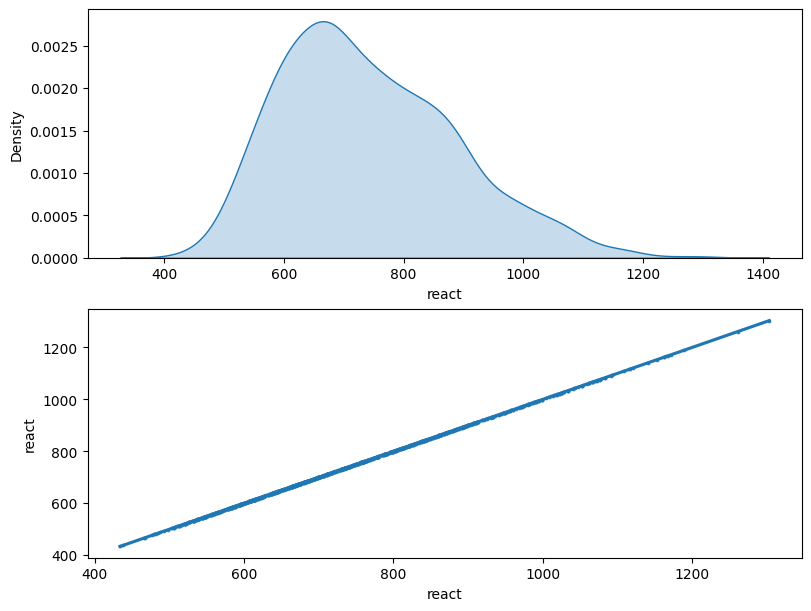

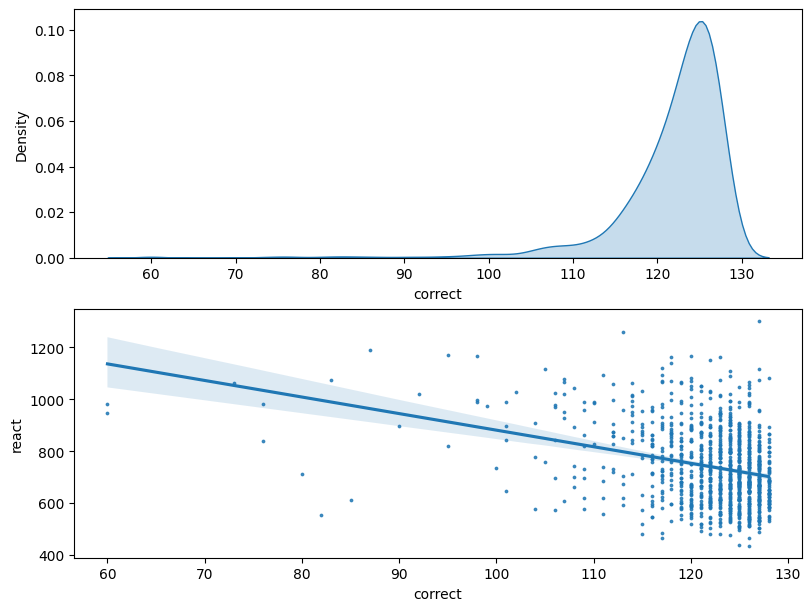

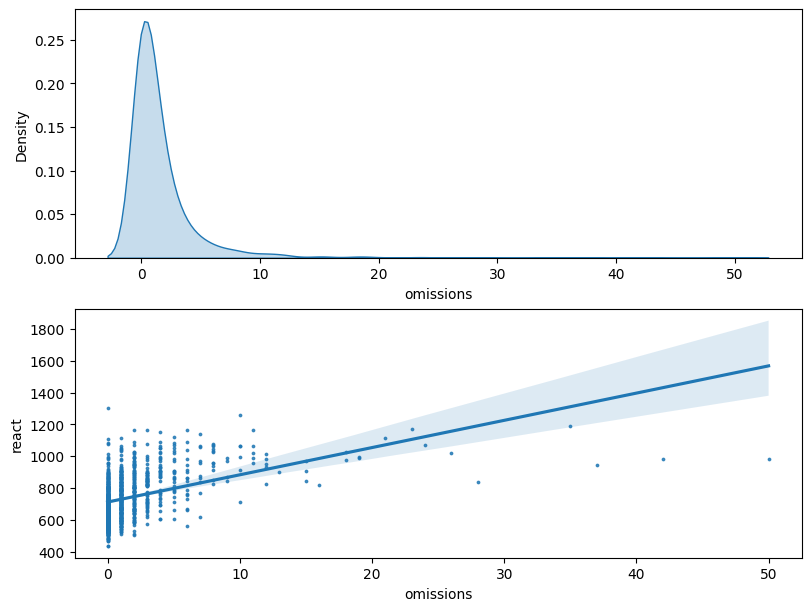

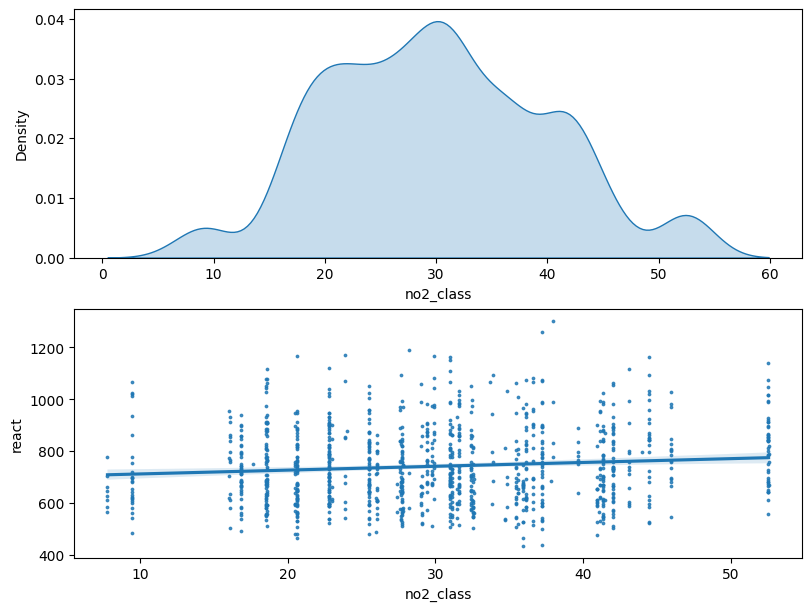

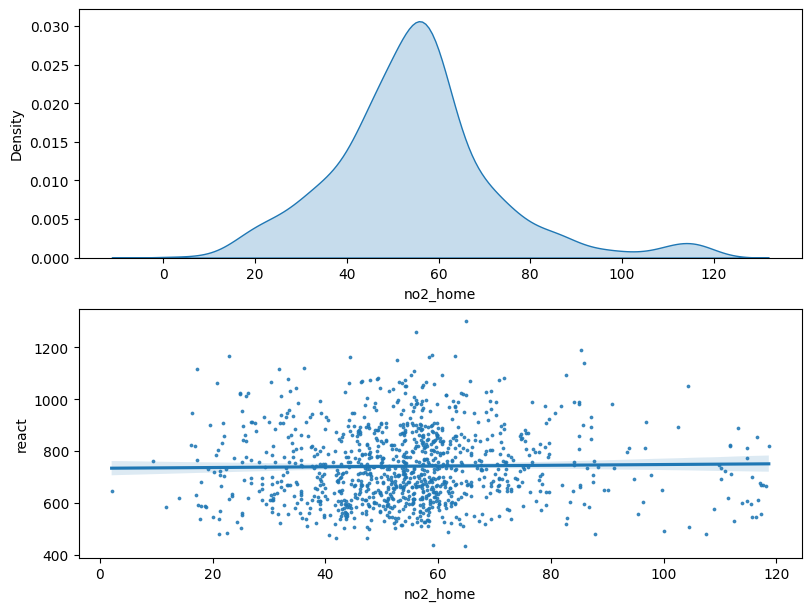

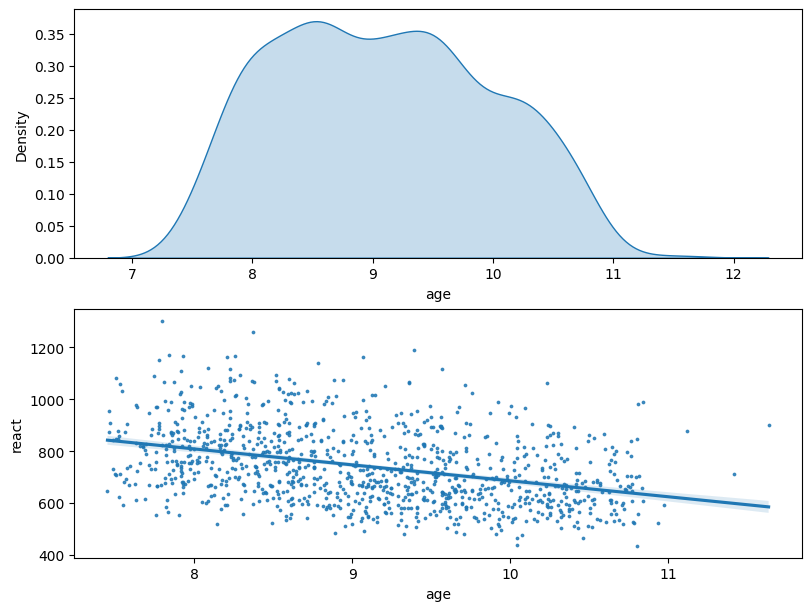

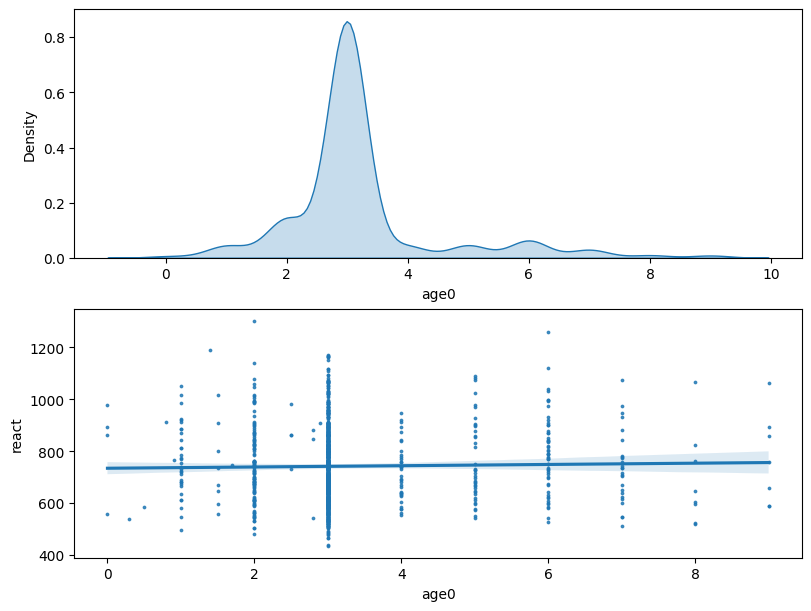

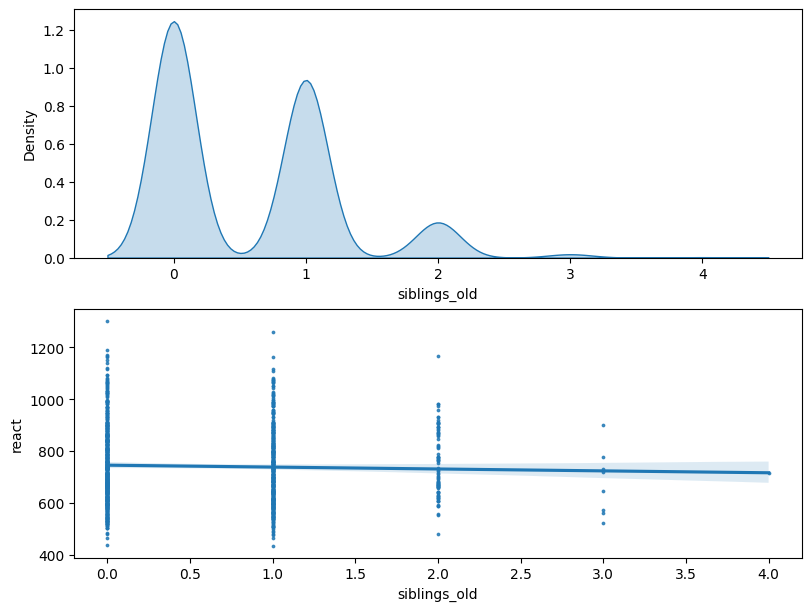

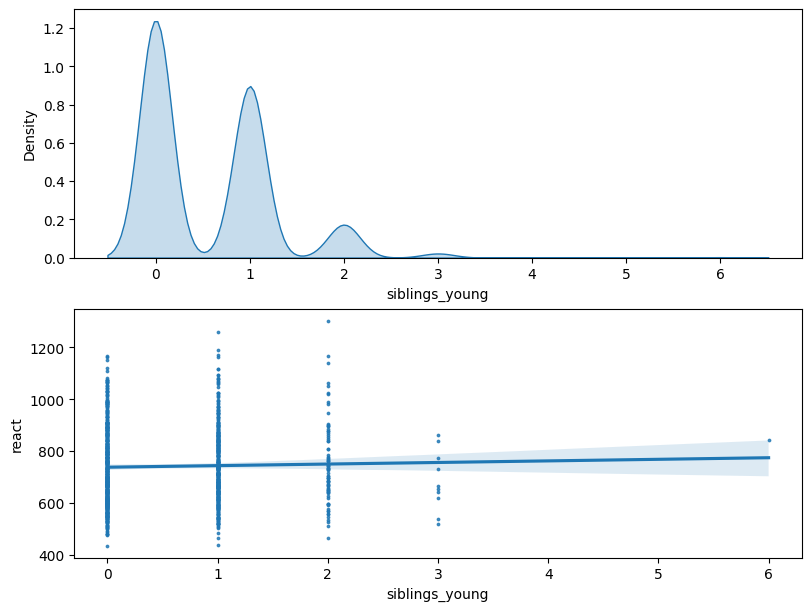

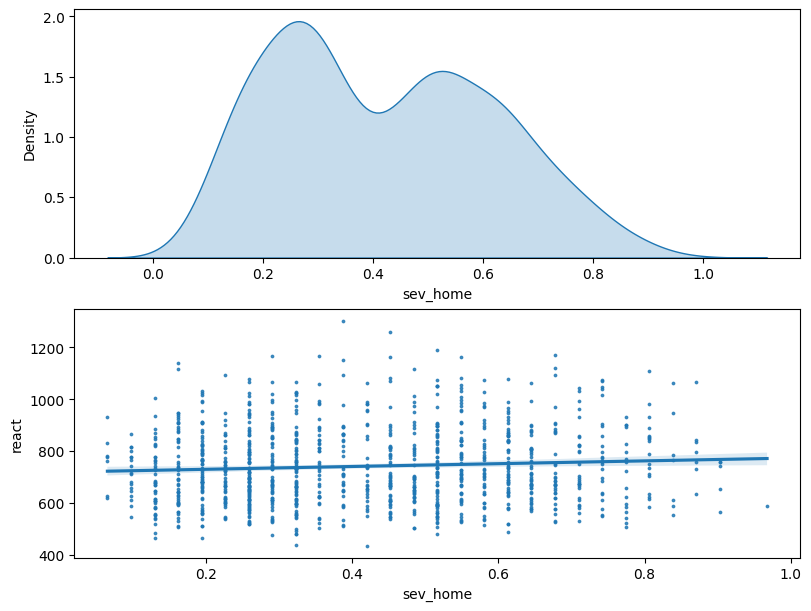

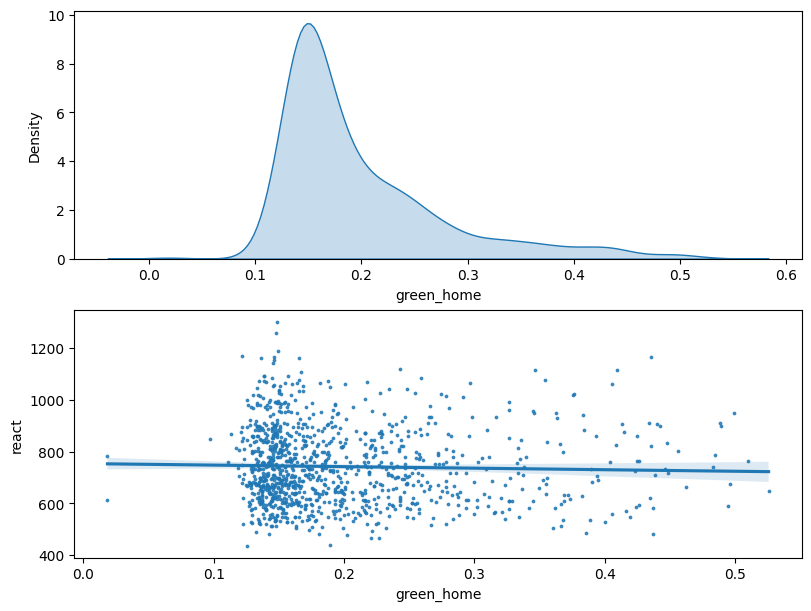

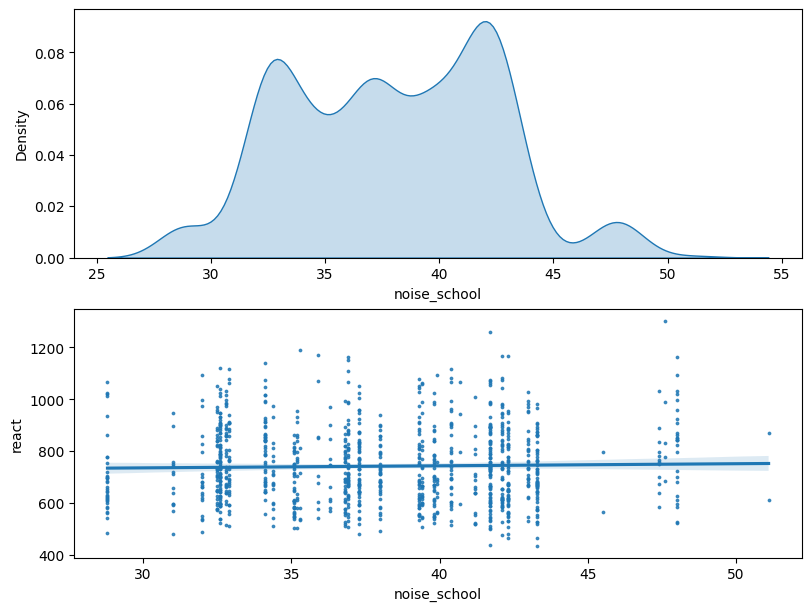

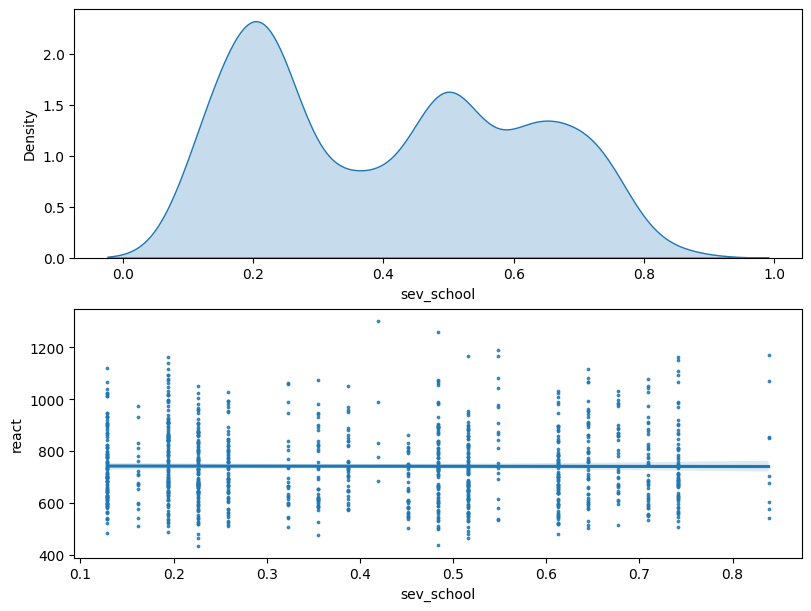

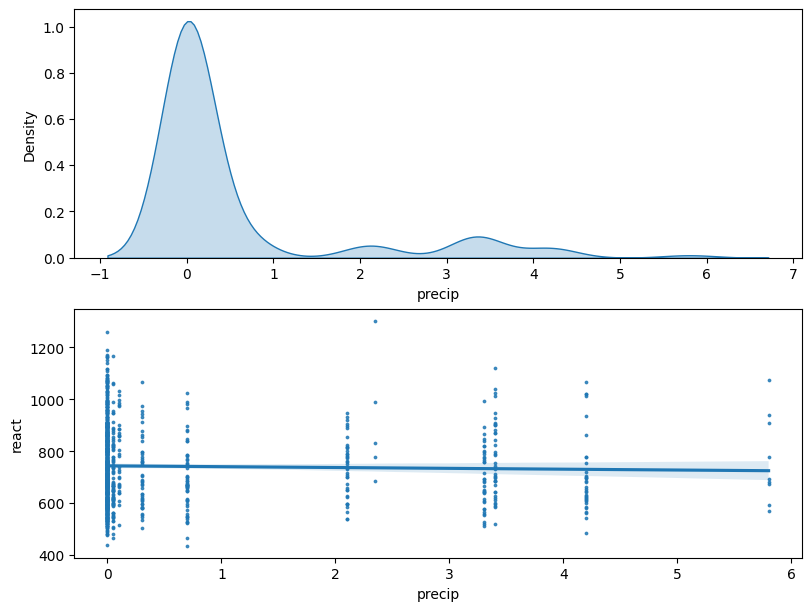

In [8]:
for i, num in enumerate(numeric_cols):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6), constrained_layout=True)
    sns.kdeplot(df_numeric[num], ax = ax1, fill = True)
    sns.regplot(x = df_numeric[num], y = df_numeric["react"], ax = ax2, scatter_kws={'s':3})
    plt.show()

- Какой вывод вы можете сделать?

- Теперь посмотрим на, так называемый, `heatmap`. Если простыми словами, то это просто красивая корреляционная матрица

### omissions  сильно перекошен, накинем логарифм

In [9]:
df_matrix['omissions_log'] =  np.log1p(df_matrix['omissions'])
df_matrix['react_log'] = np.log1p(df_matrix['react'])
df_matrix['sex'] = (df_matrix['sex'] == 'Male') * 1



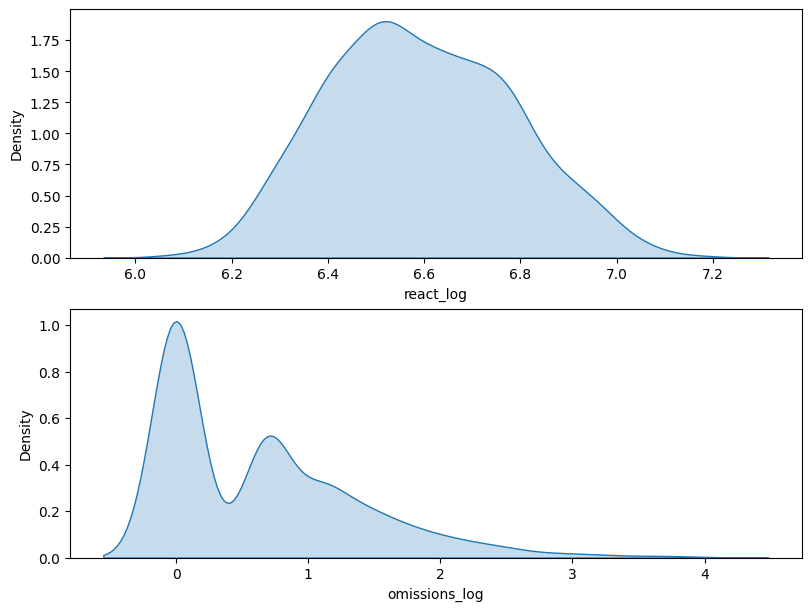

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6), constrained_layout=True)
sns.kdeplot(df_matrix['react_log'], ax = ax1, fill = True)
sns.kdeplot(df_matrix['omissions_log'], ax = ax2, fill = True)
plt.show()

In [11]:
df_matrix_dummies = pd.get_dummies(df_matrix)

In [12]:
# sns.set(rc={'figure.figsize':(20, 15)})
# sns.heatmap(df_matrix_dummies.corr(), cmap="YlOrBr", linewidths=0.1, annot=True, annot_kws={"fontsize":9}, fmt=".2f")

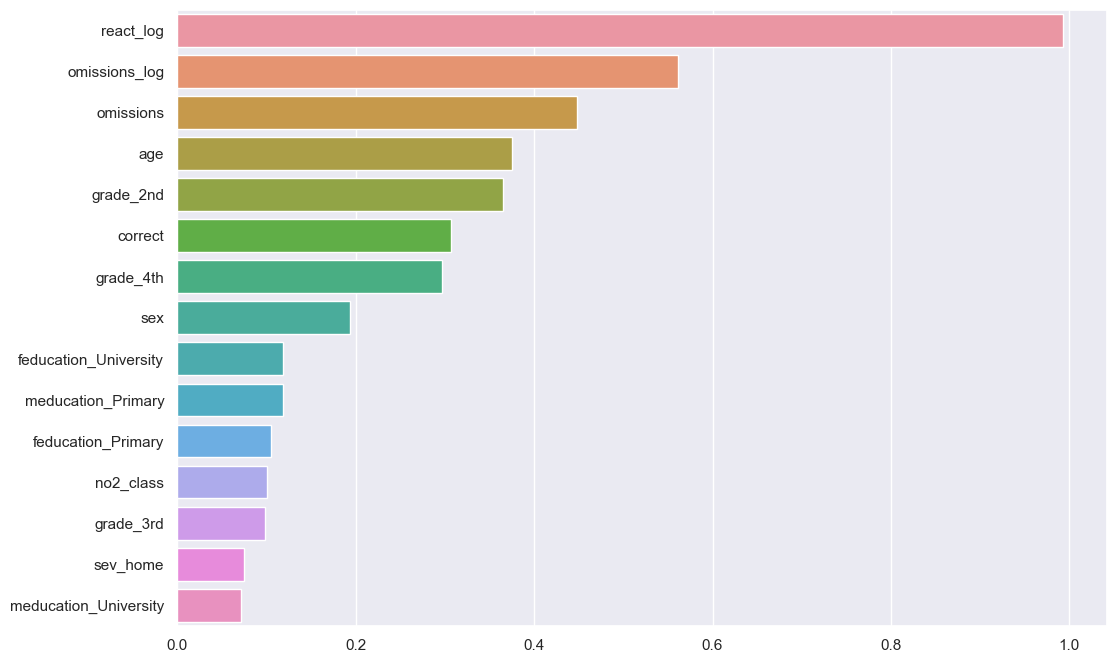

In [13]:
sns.set(rc={'figure.figsize':(12, 8)})
correlations = df_matrix_dummies.drop(columns=['react']).corrwith(df_matrix_dummies.react).abs().sort_values(ascending=False)[:15]
plot = sns.barplot(y=correlations.index, x=correlations)

- Какой вывод можно сделать?

### Из интересного 
- Образование отца и матери немного коррелирует с социально-экономическим индексом домашнего района
- Есть корелляция ~ 0.4 между образованием отца и матери, оставим образование отца
- Возраст сильно кореелирует с тем в какаом класе ребенок учится, классы дропнем
- правильные ответы сильно коррелитруют с ошибками, правильные дропнем, изза того что торопится ошибается, но реакция от этого выше
- есть отрицательна корреляция скорости реакции с возрастом 
- соц-эконом индекс района школы немного коррелирует с шумом в школе, лол. А сам шум в школе не особо кореелирует со скоростью реакции
- вес не коррелирует с реакцией
- у девчат в этом возрасте реакция лучше

- Подумайте над гипотезами о взаимосвязи между зависимой переменной и регрессорами (как переменная X *может влиять* на Y)
- Преобразуйте переменные, если необходимо
- Постройте первую версию модели

In [14]:
df_matrix['feducation'] = (df_matrix['feducation'] == 'Primary') * 1

In [15]:
def cols_stringify(cols, target):
    s = '+'.join(cols)
    s = target + '~' + s
    return s

In [16]:
cols = cols_stringify(df_matrix.drop(columns=['react', 'react_log']).columns, 'react_log')
model_1 = smf.ols(cols, data = df_matrix).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              react_log   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     30.73
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          4.90e-109
Time:                        22:58:27   Log-Likelihood:                 550.52
No. Observations:                1039   AIC:                            -1047.
Df Residuals:                    1012   BIC:                            -913.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          6.1146      0.188     32.531      0.000       5.746       6.483
grade[T.3rd]                      -0.0573      0.017     -3.347      0.001      -0.091      -0.024
grade[T.4th]                      -0.0932      0.029     -3.212      0.001      -0.150      -0.036
overweight[T.Overweight]          -0.0078      0.011     -0.721      0.471      -0.029       0.013
lbweight[T.Normal birthweight]     0.0139      0.016      0.847      0.397      -0.018       0.046
breastfeed[T.>6 months]            0.0010      0.010      0.095      0.925      -0.020       0.022
breastfeed[T.No breastfeeding]     0.0087      0.013      0.650      0.516      -0.017       0.035
msmoke[T.Smoking]                 -0.0326      0.024     -1.356      0.175      -0.080       0.015
meducation[T.Primary]              0.1550      0.068      2.286      0.022       0.022       0.288
meducation[T.Secondary]            0.1380      0.066      2.084      0.037       0.008       0.268
meducation[T.University]           0.1244      0.066      1.887      0.060      -0.005       0.254
correct                            0.0041      0.001      3.928      0.000       0.002       0.006
omissions                          0.0034      0.002      1.441      0.150      -0.001       0.008
no2_class                          0.0018      0.001      3.034      0.002       0.001       0.003
no2_home                       -2.049e-05      0.000     -0.062      0.951      -0.001       0.001
age                               -0.0311      0.013     -2.413      0.016      -0.056      -0.006
age0                               0.0054      0.004      1.513      0.131      -0.002       0.012
sex                               -0.0475      0.009     -5.128      0.000      -0.066      -0.029
feducation                         0.0223      0.020      1.144      0.253      -0.016       0.061
siblings_old                       0.0015      0.008      0.200      0.842      -0.013       0.016
siblings_young                     0.0144      0.007      1.946      0.052      -0.000       0.029
sev_home                           0.0444      0.026      1.706      0.088      -0.007       0.095
green_home                         0.0726      0.085      0.851      0.395      -0.095       0.240
noise_school                      -0.0008      0.001     -0.652      0.515      -0.003       0.002
sev_school                         0.0183      0.027      0.675      0.500      -0.035       0.071
precip                             0.0092      0.005      1.946      0.052   -7.51e-05       0.019
omissions_log                      0.1300      0.011     12.275      0.000       0.109       0.151
==============================================================================
Omnibus:                        5.

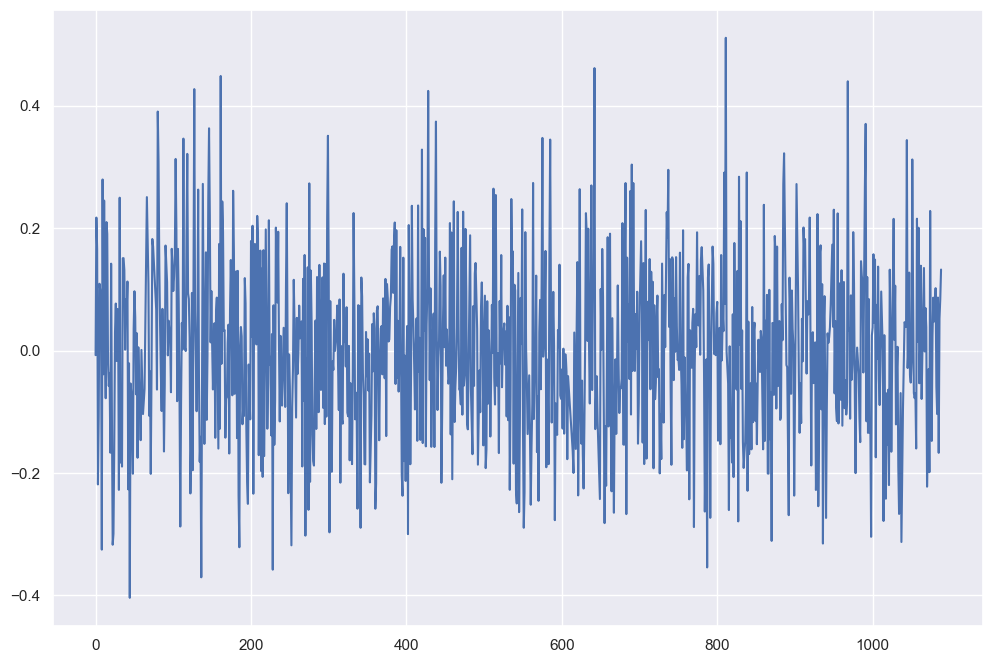

In [17]:
plt.plot(model_1.resid)

- Значима ли регрессия в целом?
- Все ли переменные значимы? Если нет, то, какие ваши дальнейшие шаги?

- Какой у вас получился $R^2, R^2_{adj}, AIC, BIC$?
- Попробуйте улучшить их

#### Есть сильная мультиколлинеарность, надо исправлять, можно повысить fscore, выкинув неважные фичи. уменьшить сложность модели, убрав фичи с маленькой корелляцией с таргетом

In [18]:
def get_vifs(df, target):
    vifs = []
    X = df.drop(columns = [target])
    for col in df.columns[1:]:
        df = X.drop(columns=[col])
        cols = cols_stringify(X.drop(columns=[col]).columns, col)
        results = smf.ols(cols, data = X).fit()
        vifs.append((col, 1 / (1 - results.rsquared)))
    return np.array(vifs)

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_matrix_numeric = df_matrix.select_dtypes(include=numerics)

In [20]:
vifs = get_vifs(df_matrix_numeric, 'react')
vf = pd.DataFrame(vifs).sort_values(1, ascending=False)
vf

,0,1
1,omissions,4.207190781348917
15,omissions_log,3.55781047892496
0,correct,2.7975325454706317
11,green_home,2.0658796694545862
16,react_log,1.7592991007900227
3,no2_home,1.7401091981840615
14,precip,1.7123139774556555
2,no2_class,1.6828984297890752
13,sev_school,1.503530314690005
12,noise_school,1.4223902685315966


In [21]:
df_model_2 = df_matrix.drop(columns=['react', 'correct', 'grade', 'meducation', 'omissions', 'no2_home', 'overweight', 'age0', 'breastfeed',\
                                              'no2_class','siblings_old','siblings_old', 'siblings_young', 'green_home', 'noise_school', 'lbweight',\
                                               'sev_school', 'msmoke', 'react_log'])

In [22]:
df_model_2.dropna(inplace=True)

In [23]:
cols = cols_stringify(df_model_2.columns, 'react_log')
model_2 = smf.ols(cols, data = df_matrix).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              react_log   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     127.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          4.99e-122
Time:                        22:58:28   Log-Likelihood:                 544.00
No. Observations:                1084   AIC:                            -1074.
Df Residuals:                    1077   BIC:                            -1039.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.1039      0.049    145.920      0.000       7.008       7.199
age              -0.0654      0.005    -12.771      0.000      -0.075      -0.055
sex              -0.0560      0.009     -6.241      0.000      -0.074      -0.038
feducation        0.0359      0.017      2.142      0.032       0.003       0.069
sev_home          0.0601      0.023      2.598      0.010       0.015       0.106
precip            0.0077      0.004      2.067      0.039       0.000       0.015
omissions_log     0.1242      0.006     20.207      0.000       0.112       0.136
==============================================================================
Omnibus:                        4.812   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.892
Skew:                           0.157   Prob(JB):                       0.0867
Kurtosis:                       2.903   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

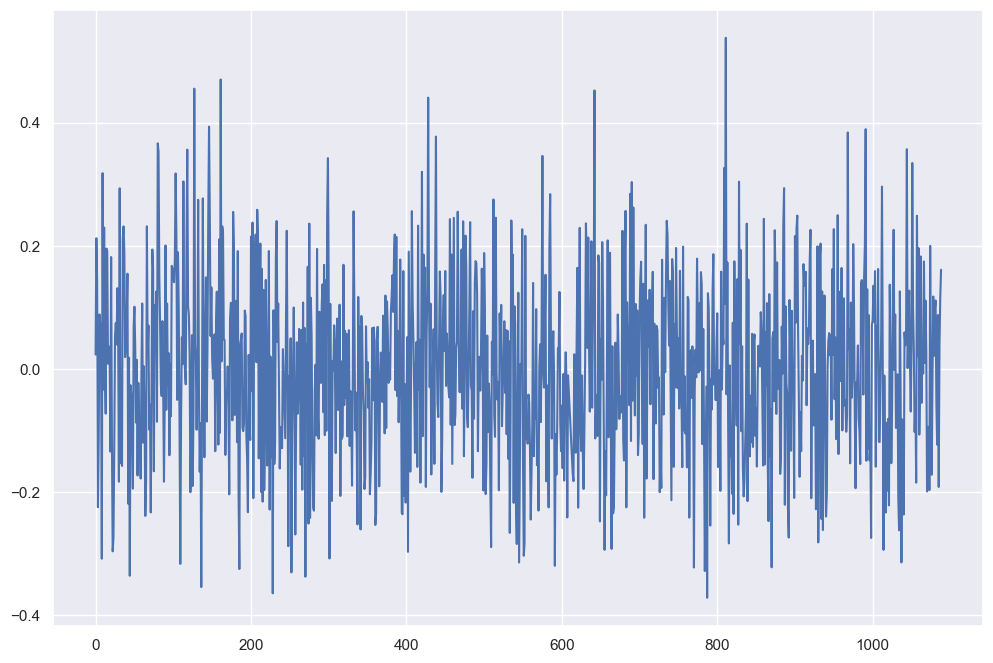

In [24]:
plt.plot(model_2.resid)

In [25]:
sm.stats.diagnostic.het_white(model_2.resid, sm.add_constant(df_model_2))

(25.78032857162576,
 0.41939470191052713,
 1.030999077609803,
 0.42148446433818226)

- По какой метрике вы бы решали, что ваша регрессия улучшилась?

### Все фичи стали статзначимо важны, нет мультиколлинеарности, нет гетероскедастичности, при этом BIC AIC улучшились

# №3 (40 баллов)

- Ладно, пришла пора для чего более сложного
- В этой задаче вы сами все решаете. Более того, у вас будут даже чужие ноутбуки
- Если вы проведете такой же анализ, что и выше, то балл за это задание будет равен 10/40
- Чтобы получить максимальный балл за это задание, то вам нужно будет провести полноценное исследование

- Итак, представьте себе следующую ситуацию
- Вы участвуете в создании продукта/модели по оценке стоимости недвижимости в стартапе 
- Вы - главный аналитик, который отвечает за создание модели и презентацию ее результатов
- Проблема в том, что вы единственный аналитик в команде. Все остальные члены команды **не имеют математического бэкграунда, они не знают никаких моделей, они никогда не занимались программированием**. Зато они очень хорошо разбираются в бизнесе
- Вы знаете, что для тестривания модели на первом этапе подойдет [этот](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) замечательный датасет (`HW_001_002.zip`). Там есть примеры различного анализа и моделей
- Но вы не можете просто взять примеры оттуда:
    - Во-первых, ваша модель должна быть линейной (хотя бы на первых порах, в будущем, после курса по ML, можете брать и нелинейные модели)
    - Во-вторых, ваша цель не просто предсказание цены на ту или иную недвижимости, а **описание механизма ценообразования на рынке**
    - В-третьих, вашей команде очень важно, чтобы результаты модели были адекватными. **За каждой из включенных переменных должна стоять гипотеза о том, почему эта переменная влияет на цену**. Значимость переменной не является достаточным объяснением о включении переменной в конечную модель
- Помните, что это лишь первая версия модели. Основая цель для текущего анализа - это понимание того, 
    - какие данные есть, 
    - как они "выглядят", 
    - какая получается модель, 
    - какие выводы можно сделать, 
    - насколько эти выводы адекватны и соответствуют вашим гипотезам,
    - как можно еще улучшить модель
- Еще важный момент. Вы отправите, получившееся исследование команде, поэтому оно не должно быть большим (время на прочтение и понимание того, что происходит, не должно занимать более 10-15 минут). Помните, что у команды есть и другие задачи, поэтому позаботьтесь, чтобы исследование было:
    - Структурированным. Можете использовать [классический](https://blogs.lse.ac.uk/impactofsocialsciences/2018/05/21/writing-a-page-turner-how-to-tell-a-story-in-your-scientific-paper/) подход к научному исследованию и добавить то, как делают [консультанты](https://strategyu.co/mckinsey-structured-problem-solving-secrets/)
    - Отвечало на поставленную задачу
    - Было самодостаточным (в одном jupyter файле, проще говоря)
    - Воспроизводимым (не будет `seed`, если/где надо, будет 0 за это задание)
    - Было не стыдно показать CEO и др. в стартапе (если графики будут без подписей осей и названия, как минимум, будет 0)

In [26]:
df_matrix = pd.read_csv('HW_001_001.csv')

## Решение в папке task3

# №4 (20 баллов)*  
- Это задание со звездочкой
- Баллы за это задание идут как дополнительные баллы
- Общий балл за это домашнее задание не может превышать 100 баллов
- Например, если за предыдущие 3 задания было набрано 100 баллов и за это задание набрано 20 баллов, то итоговый балл будет 100 баллов. Если же за предыдущие 3 задания было набрано 90 баллов и за это задание набрано 20 баллов, то итоговый балл все равно будет 100 баллов

- В далеком XIX веке в Лондоне была эпидемия холеры
- В те времена считалось, что холера передается воздушно-капельным путем
- Но один ученый заподозрил, что это не так. Кол-во заболеваний не уменьшалось при соблюдении всех мер предосторожности при такой передаче заболевания
- Ученого звали John Snow ([Snow 1855](https://mixtape.scunning.com/references.html#ref-Snow1854))
- Разберем его идею к дизайну эксперимента 

**Нулевая гипотеза: холера передается водоснабжением**

- Как бы это проверяли, если бы имели бесконечные ресуры? Опишите идеальный эксперимент.

- Но такого сделать мы, конечно, не можем. Однако у нас есть следующая информация
- В 1800-х несколько водоснабжающих компанй обслуживали город. Они все брали воду из Темзы, которая, если верить нашей гипотезе, была зараженной
- Но в 1849 компания Lambeth передвинула свои трубу выше по течению, а компании Southwark и Vauxhall Waterworks Company нет
- Как бы нам это использовать для проверки нашей гипотезы?

- Ниже представлена таблица со смертностью в 1849 г. и 1854 г. для потребителей двух разных компаний

|Компания\Год|1849|1854|
|---|---|---|
|Southwark and Vauxhall|135|147|
|Lambeth|85|19|

- Пусть $Y$ - это смертность
- Пусть $D$ - это влияние чистой воды на смертность от холеры (очевидно, если нулевая гипотеза верна, то это влияние отрицательное)
- Пусть $L$ и $SV$ - это фиксированный эффект\влияние специфичный для каждой из компаний Lambeth и Southwark and Vauxhall, соответственно. Например, у них могут быть разные трубы и\или системы очистки воды

|Компания|Результат|
|---|---|
|Southwark and Vauxhall|$$Y=SV$$|
|Lambeth|$$Y=L+D$$|

- Почему мы не можем просто вычесть из результата Lambeth результат Southwark and Vauxhall?

- Однако, у нас еще есть временные данные
- Пусть $T$ - это некий временной эффект

|Компания|Время|Результат|
|---|---|---|
|Lambeth|До|$$Y=L$$|
||После|$$Y=L+D+T$$|

- Как будет выглядеть эта табличка для Southwark and Vauxhall?
- Чему будет равно $D$ на тех данных, что были выше?

- То, что вы проделали выше называется `DiD` (difference in differences). Это замечательный метод, который позволяет вам контролировать эффект от эксперимента (`treatment`) на какие-то другие переменные
- Он, отнюдь, не ограничивается временным эффектом, но для простоты задания не будет заходить дальше
- Давайте немного формул для понимания того, что было вами проделано. 
    - Вы нашли `D` - эффект, который оказала чистая вода на смертность от холеры. В идеальном мире, мы с вами бы его считали, как $E[Y_{T=1, S=1} - Y_{T=1, S=0}]$, т.е. уровень смертности в один и тот же момент времени ($T=1$) для контрольной ($S=0$) и тестовой ($S=1$) групп. Но, такое не всегда, мягко говоря, возможно.
    - Поэтому вам пришлось изхищряться, чтобы вычленить временной эффект, т.е. вы считали:
    $$D = (E[Y_{T=1}|S=1] - E[Y_{T=0}|S=1]) - (E[Y_{T=1}|S=0] - E[Y_{T=0}|S=0])$$
    - Это, конечно, замечательное число, но значимо ли оно? На этот вопрос нам с вами поможет ответить, в частности, простая линейная регрессия с дамми/бинарными переменными: $\hat{y} = \hat{\beta_0} + \hat{\beta_1} \cdot T + \hat{\beta_2} \cdot S + \hat{\beta_3} \cdot T \cdot S$
    - Если мы с вами посмотрим на $\beta_0$, то при $T=0, S=0 \rightarrow \hat{y} = \hat{\beta_0} \rightarrow E[y|T=0, S=0] = \hat{\beta_0}$ 
    - Хм, а если у нас $T=1, S=0 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_1} \rightarrow \hat{\beta_1} = \hat{y} - \hat{\beta_0} = E[y|T=1, S=0] - E[y|T=0, S=0]$
    - А если $T=0, S=1 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_2} \rightarrow \hat{\beta_2} = \hat{y} - \hat{\beta_0} = E[y|T=0, S=1] - E[y|T=0, S=0]$
    - А если 
    $$T=1, S=1 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_1} + \hat{\beta_2} +\hat{\beta_3} \rightarrow \\
    E[y|T=1, S=1] = E[y|T=0, S=0] + (E[y|T=1, S=0] - E[y|T=0, S=0]) + (E[y|T=0, S=1] - E[y|T=0, S=0]) +\hat{\beta_3} \rightarrow \\
    \hat{\beta_3} = (E[y|T=1, S=1] - E[y|T=0, S=1]) - (E[y|T=1, S=0] - E[y|T=0, S=0])$$
    - А вот и наш эффект, который мы так хотели посчитать и проверить на стат. значимость. Думаю, что вы уже знаете, как проверять стат. значимость коэффициентов линейной регрессии.

- Перейдем к чему-то с данными
- Надо понять маркетинговый эффект от рекламы на билбордах на увеличение депозитов ($\text{deposits}$) с мая ($JUL = 0$) по июль ($JUL = 1$)
- Всего есть 3 билборда в городе Porto Alegre ($POA = 1$) и никаких наших билбордов в городе Florianopolis ($POA = 0$)
- Посчитайте эффект от рекламы и проверьте его на значимость

In [27]:
data = pd.read_csv("HW_001_003.csv")
data.head()

,deposits,poa,jul
0,42,1,0
1,0,1,0
2,52,1,0
3,119,1,0
4,21,1,0


- В чем основная слабость этого подхода?